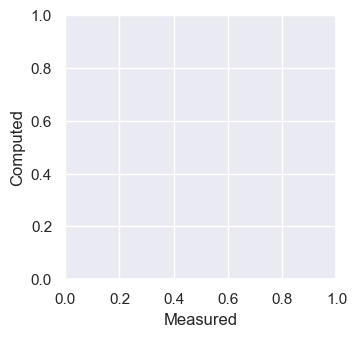

In [1]:
#!/usr/bin/env python3

# -*- coding: utf-8 -*-

#**************************************************************************************#
# a-ARM protocol                                                                       #
# Leonardo Barneschi                                                                   #
# leonardo.barneschi@student.unisi.it                                                  #
# PhD student | Laboratory for Computational Photochemistry and Photobiology           #
# University of Siena                                                                  #
# Reference: J. Chem. Theory Comput., 2019, 15, pp 3134-3152                           #
#********************* ****************************************************************#

from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import seaborn as sns
import matplotlib.pylab as plt
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import argparse
import csv
import os
import sys
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as pe
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import warnings
import sys
import textwrap

plt.rcParams['figure.figsize'] = [7.0, 3.5]
plt.rcParams['figure.dpi'] = 100 
sns.set(font="Arial")

warnings.filterwarnings('ignore')

parameters = {'y_offset' : 1,
              'x_offset' : 1,
              'canvas_dimension' : {'figsize':(3.5,3.5)},
              'x_title_dimension': {'size':12},
              'y_title_dimension': {'size':12},
              'z_title_dimension': {'size':12}}

labels = {'fontproperties' : fm.FontProperties(size=12),
          'rotation'       : 'horizontal'}

ticks = {}

def create_csv_dict(csv_table):

    with open(csv_table, 'r') as ct:
        dataframe = pd.read_csv(ct, header=0)

    return dataframe

#======================================================================================#
# Plots Parser
#======================================================================================#
def read_single_arguments(command_line=None):
    '''
    This function reads the command line arguments
    '''

    parser = argparse.ArgumentParser(
        formatter_class=argparse.RawDescriptionHelpFormatter,
        description=textwrap.dedent('''\
        --------------------------------------------------------

        --------------------------------------------------------

        Cite:
        [J. Chem. Theory Comput., 2016, 12, pp 6020-6034]
        [J. Chem. Theory Comput., 2016, 12, pp 6020-6034]
        [J. Chem. Theory Comput., 2016, 37, pp 506-541]

        Required files:
        - a-ARM_Project.csv

        '''
))

    parser.add_argument(
        '--debug',
        action='store_true',
        help='Print debug info'
    )

    parser.add_argument('-o', '--outfile_name', dest='outfile_name',
                        required=True,
                        type=str,
                        help=('''
                        prefix name for every plot.
                        '''))

    parser.add_argument('-n', '--names_list', dest='names_list',
                        required=True,
                        nargs='+',
                        type=str,
                        help=('''
                        protein names to be shown in the plots.
                        '''))

    parser.add_argument('-p', '--result_path', dest='result_path',
                        required=True,
                        type=str,
                        help=('''
                        path where the plots are stored.
                        '''))

    parser.add_argument('-x', '--xlim', dest='xlim',
                        required=False,
                        nargs='+',
                        type=int
                        )

    parser.add_argument('-y', '--ylim', dest='ylim',
                        required=False,
                        nargs='+',
                        type=int
                        )

    parser.add_argument('-e', '--err_bars', dest='err_bars',
                        required=False,
                        type=bool
                        )

    parser.add_argument('-f', '--fit_line', dest='fit_line',
                        required=False,
                        type=bool
                        )
    subprasers = parser.add_subparsers(dest='command')

    args = parser.parse_args(command_line)
    if args.debug:
        print("debug: " + str(args))

        args = parser.parse_args()

    #----------------------------------------------------------------------------------#
    # Retrieve the argument                                                            #
    #----------------------------------------------------------------------------------#
    path = args.path
    name = args.name
    csv_file = args.csv_file
    xlim = args.xlim
    ylim = args.ylim
    err_bars = args.err_bars
    fit_line = args.fit_line

    return (csv_file, path, name, xlim, ylim, err_bars, fit_line)

def plot_correlation(csv_dict, project, path, xlim=None,
                                              ylim=None,
                                              err_bars=None,
                                              fit_line=None):

    fig, ax = plt.subplots(**parameters['canvas_dimension'])

    if ylim != None:
        ax.set_yticks(np.arange(ylim[0], ylim[1]+parameters['y_offset'], ylim[2]))
        ax.set_ylim(ylim[0]-parameters['y_offset'], ylim[1]+parameters['y_offset'])

    if xlim != None:
        ax.set_xticks(np.arange(xlim[0], xlim[1]+parameters['x_offset'], xlim[2]))
        ax.set_xlim(xlim[0]-parameters['x_offset'], xlim[1]+parameters['x_offset'])

    # Set X and Y axis titles.
    ax.set_xlabel('Measured', **parameters['x_title_dimension'])
    ax.set_ylabel('Computed', **parameters['y_title_dimension'])

    df_col_length = len(csv_dict.iloc[:,0])

    return csv_dict

#==============================================================================#
# Main Function (driver)
#==============================================================================#
def plot_out(csv_file, result_path, project, xlim, ylim, err_bars, fit_line):

    csv_dict = create_csv_dict(csv_file)

    if result_path != '.':
        result_path = result_path+'/'+'png/'

        if not os.path.exists(result_path):
            os.makedirs(result_path)
        else:
            asf.print_normal_output("The {} already exists, I am not allowed to overwrite it. Bye bye!".format(result_path))
            sys.exit()
            
        df = plot_correlation(csv_dict, result_path, project, xlim, ylim, err_bars, fit_line)

    else:
        df = plot_correlation(csv_dict, result_path, project, xlim, ylim, err_bars, fit_line)

    return df

def main():
    csv_file, path, project, xlim, ylim, err_bars, fit_line = read_single_arguments()
    plot_out(csv_file, path, project, xlim, ylim, err_bars, fit_line)

if __name__ == "__main__":

    xlim = None
    ylim = None
    err_bars = None
    fit_line = None
    #csv_file = 'kr2_mutants.csv'
    csv_file = '/home/leonardo/Desktop/JupyterLab_Templates/csv/kr2_mutants.csv'
    project = 'kr2'
    path = '.'
    csv_dict = plot_out(csv_file, path, project, xlim, ylim, err_bars, fit_line)


In [2]:
csv_dict

,model,C5=C6,C6-C7,C7=C8,C8-C9,C9=C10,C10-C11,C11=C12,C12-C13,C13=C14,C14-C15,C15=N,BLA
0,wild type,172.787,-176.580,175.887,174.344,172.011,-175.788,165.914,-170.931,157.349,-178.606,162.436,0.109
1,P219A,172.144,-178.305,176.611,175.670,172.080,-175.482,165.744,-170.167,157.203,-178.635,163.027,0.109
2,P219C,173.475,-178.126,176.885,176.148,172.138,-174.998,165.636,-170.506,157.212,-178.754,162.495,0.109
3,P219D,176.600,-171.310,175.856,171.871,171.314,-177.383,165.252,-172.355,155.394,-176.498,158.891,0.109
4,P219E,173.987,-178.346,176.929,175.580,172.203,-176.096,165.378,-170.925,156.864,-178.481,162.948,0.108
5,P219F,172.223,-178.991,177.731,175.420,172.325,-175.218,165.727,-170.252,157.118,-178.695,163.261,0.108
6,P219G,174.253,-174.540,176.823,175.269,171.622,-175.887,165.498,-171.622,155.261,-176.301,159.390,0.108
7,P219H,172.123,-177.479,176.773,175.393,171.986,-176.028,165.755,-171.731,155.637,-176.381,159.544,0.108
8,P219I,165.007,178.242,173.543,173.823,172.202,-176.240,166.060,-171.030,157.540,-178.260,162.932,0.109
9,P219K,173.325,-175.929,176.213,175.026,171.741,-175.795,165.756,-171.324,157.178,-178.366,162.606,0.108


In [3]:
df = csv_dict.iloc[:,1:12]

In [4]:
def angdev(a, b):
    
    if a>b and a>0 and b>0:
#        return '{:.2f}'.format(b-a)
        return '{:.2f}'.format(a-b)
    
    elif a>b and a>0 and b<0:
        return '{:.2f}'.format( (180-a)+(180+b) )

    elif a>b and a<0 and b<0:
        return '{:.2f}'.format(a-b)
        
    elif a<b and a>0 and b>0:
        return '{:.2f}'.format(a-b)
    
    elif a<b and a<0 and b>0:
        return '{:.2f}'.format( ((180+a)+(180-b)) )
    
    elif a<b and a<0 and b<0:
        return '{:.2f}'.format(a-b)

In [5]:
new_df = {}
new_array = []

for k in df.keys():
    ref = df[k][0]
    array = np.asarray(df[k][1:])    
    for j in range(len(array)):
        new_array.append(angdev(ref, array[j]))
    
    new_df[k] = [ref]+new_array
    new_array = []

In [6]:
new_df = pd.DataFrame(new_df)

In [7]:
new_df =  new_df.apply(pd.to_numeric)

In [8]:
pd.set_option('display.float_format','{:.1f}'.format)
new_df

,C5=C6,C6-C7,C7=C8,C8-C9,C9=C10,C10-C11,C11=C12,C12-C13,C13=C14,C14-C15,C15=N
0,172.8,-176.6,175.9,174.3,172.0,-175.8,165.9,-170.9,157.3,-178.6,162.4
1,0.6,1.7,-0.7,-1.3,-0.1,-0.3,0.2,-0.8,0.1,0.0,-0.6
2,-0.7,1.6,-1.0,-1.8,-0.1,-0.8,0.3,-0.4,0.1,0.1,-0.1
3,-3.8,-5.3,0.0,2.5,0.7,1.6,0.7,1.4,1.9,-2.1,3.5
4,-1.2,1.8,-1.0,-1.2,-0.2,0.3,0.5,-0.0,0.5,-0.1,-0.5
5,0.6,2.4,-1.8,-1.1,-0.3,-0.6,0.2,-0.7,0.2,0.1,-0.8
6,-1.5,-2.0,-0.9,-0.9,0.4,0.1,0.4,0.7,2.1,-2.3,3.0
7,0.7,0.9,-0.9,-1.1,0.0,0.2,0.2,0.8,1.7,-2.2,2.9
8,7.8,5.2,2.3,0.5,-0.2,0.5,-0.1,0.1,-0.2,-0.3,-0.5
9,-0.5,-0.7,-0.3,-0.7,0.3,0.0,0.2,0.4,0.2,-0.2,-0.2


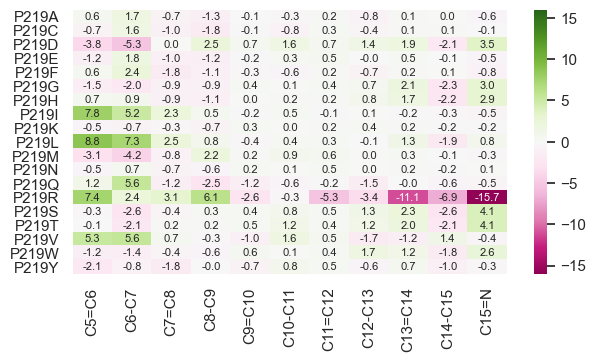

In [9]:
ax = sns.heatmap(new_df.iloc[1:,:], yticklabels=csv_dict.iloc[1:,0],center=0, vmin=-16, vmax=16, annot=True,cmap="PiYG", linewidth=0, linecolor='#000000', fmt='.1f', annot_kws={"size": 8})
#cbar = ax.figure.colorbar(ax.collections[0])
#cbar.set_frame_on(True)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

plt.savefig('/home/leonardo/Desktop/heatmap.png', bbox_inches='tight', dpi=600)
plt.show()